## Can we classify the type of wine using chemical and physical information?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph

from Helpers.graphing import plot_multiple_scatters
from rosey.graphing import plot_barplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

from Helpers.model_evaluation import (plot_feature_importance, plot_roc, 
                                      plot_confusion_matrix, plot_class_proba)

graph.style.use('fivethirtyeight')

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data sets and merge
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'

df = pd.concat([df_red, df_white])
display(df.head())
display(df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


(4872, 13) (1625, 13)


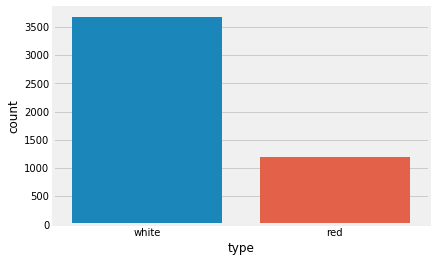

In [3]:
# Train test split
train, test = train_test_split(df, stratify=df['type'])

# Number of each type of wine
print(train.shape, test.shape)

sns.countplot(train['type'])
graph.show()

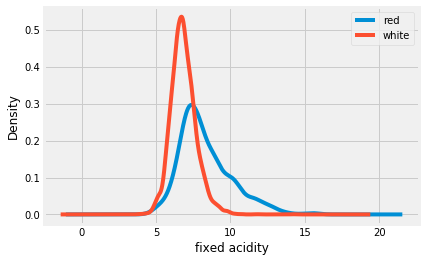

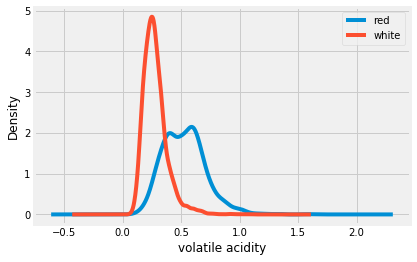

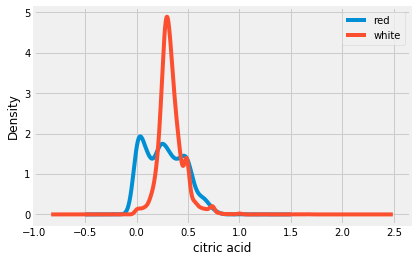

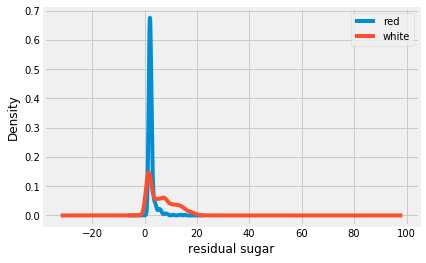

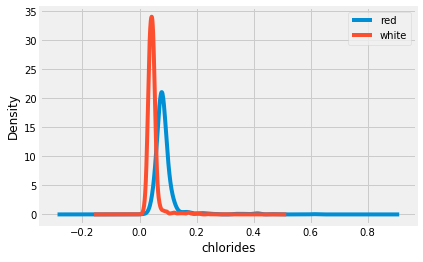

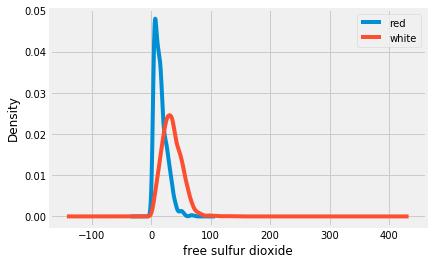

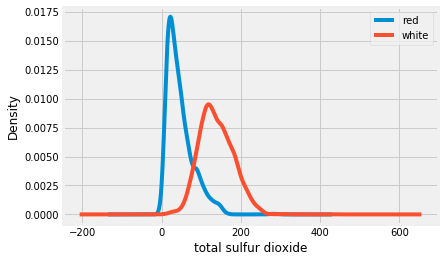

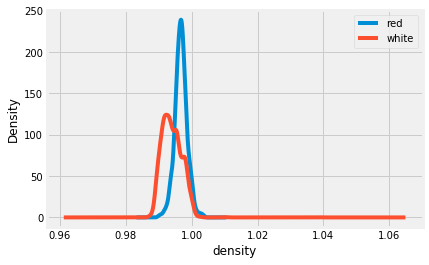

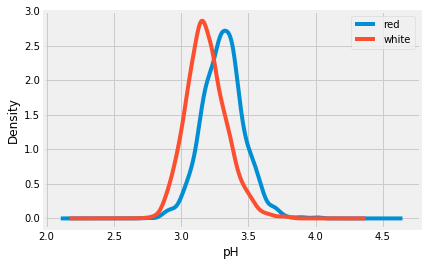

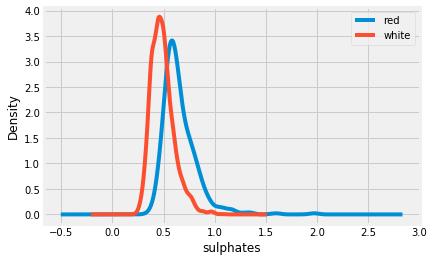

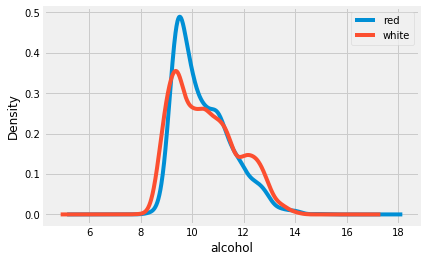

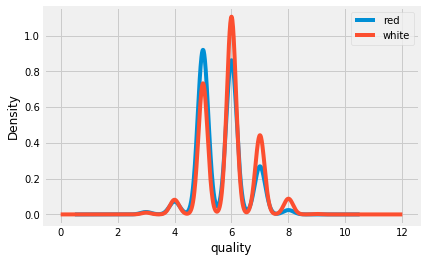

In [4]:
# Distribution of the different features based on wine type
for col in df.columns[:-1]:
    df.groupby('type')[col].plot(kind='kde')
    graph.legend()
    graph.xlabel(col)
    graph.show()

The separations in the features are better than I thought we should be able to classify this

In [5]:
x, y = train.drop('type', axis='columns'), train['type']
test_x, test_y = test.drop('type', axis='columns'), test['type']

# Transform features
std_scaler = StandardScaler()
std_scaler.fit(x)
x = std_scaler.transform(x)
test_x = std_scaler.transform(test_x)

# Transform outcome
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
test_y = le.transform(test_y)

/home/harshil/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/harshil/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/home/harshil/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Modelling

In [6]:
def evaluate(model, features=x, true_y=y):
    prediction = model.predict(features)
    print(f'Accuracy score: {accuracy_score(true_y, prediction)}')
    print(f'F1 score:       {f1_score(true_y, prediction)}')
    print(f'ROC AUC score:  {roc_auc_score(true_y, prediction)}')

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(x, y)

evaluate(logistic_model)

Accuracy score: 0.9938423645320197
F1 score:       0.9959205874354093
ROC AUC score:  0.9905793170504417


/home/harshil/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


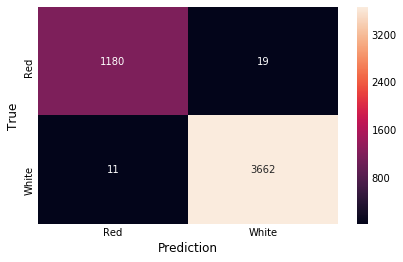

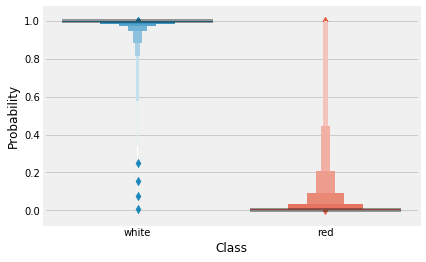

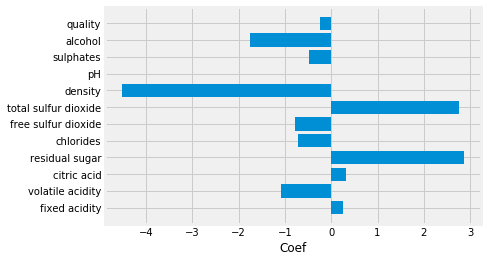

In [8]:
plot_confusion_matrix(logistic_model, x, y, show_graph=False, labels=['Red', 'White'])
graph.xlabel('Prediction')
graph.ylabel('True')
graph.show()

plot_class_proba(logistic_model, x, y, show_graph=True, label_encoder=le)

plot_feature_importance(train.columns[:-1], logistic_model.coef_[0], show_graph=False)
graph.xlabel('Coef')
graph.show()

In [9]:
rf_model = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'n_estimators': [100, 1000, 2000], 
              'min_samples_split': [5, 10],
              'max_features': [5, 8, 10]
    },
    n_jobs=-1,
    cv=10,
)

rf_model.fit(x, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 1000, 2000], 'min_samples_split': [5, 10], 'max_features': [5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
best_rf_model = rf_model.best_estimator_
evaluate(best_rf_model)

Accuracy score: 0.999384236453202
F1 score:       0.9995917811947204
ROC AUC score:  0.9987489574645537


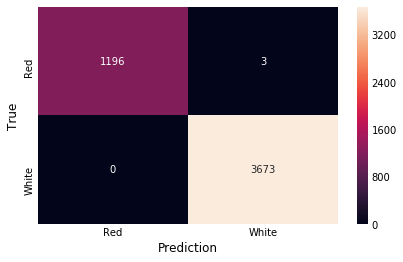

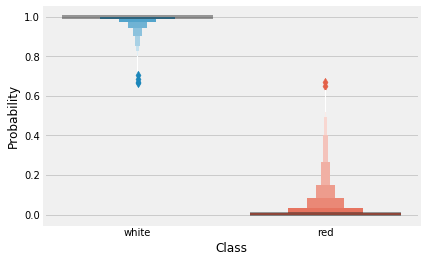

<function matplotlib.pyplot.show>

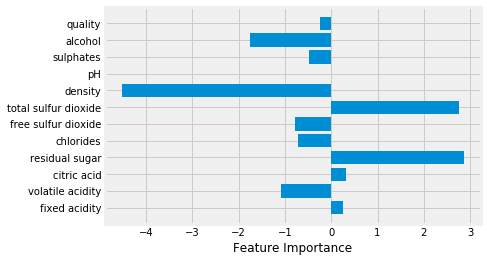

In [11]:
plot_confusion_matrix(best_rf_model, x, y, show_graph=False, labels=['Red', 'White'])
graph.xlabel('Prediction')
graph.ylabel('True')
graph.show()

plot_class_proba(best_rf_model, x, y, show_graph=True, label_encoder=le)

plot_feature_importance(train.columns[:-1], logistic_model.coef_[0], show_graph=False)
graph.xlabel('Feature Importance')
graph.show

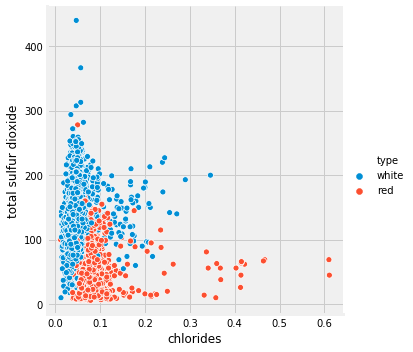

In [12]:
sns.relplot(x='chlorides', y='total sulfur dioxide', data=train, hue='type')
graph.show()

# Test Set Performance

### Logistic Regression

In [13]:
evaluate(logistic_model, test_x, test_y)

Accuracy score: 0.9981538461538462
F1 score:       0.9987750102082482
ROC AUC score:  0.9979336734693878


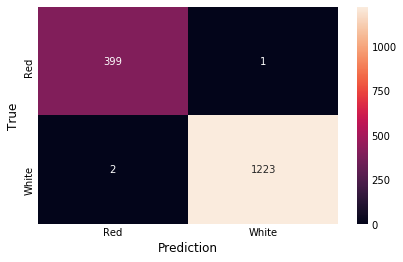

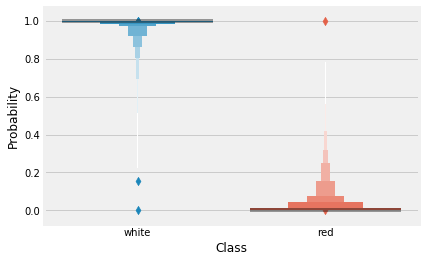

In [14]:
plot_confusion_matrix(logistic_model, test_x, test_y, show_graph=False, labels=['Red', 'White'])
graph.xlabel('Prediction')
graph.ylabel('True')
graph.show()

plot_class_proba(logistic_model, test_x, test_y, show_graph=True, label_encoder=le)

### Random Forest

In [15]:
evaluate(best_rf_model, test_x, test_y)

Accuracy score: 0.9969230769230769
F1 score:       0.9979600163198694
ROC AUC score:  0.9954336734693878


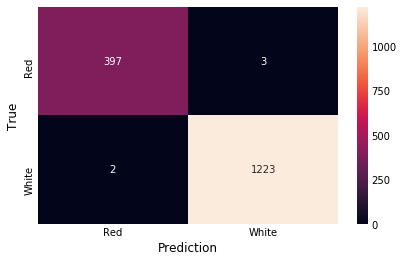

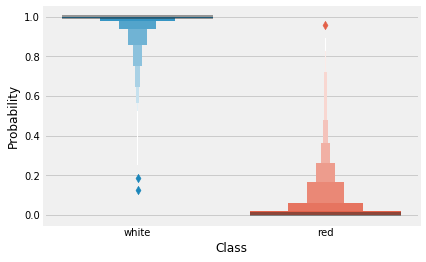

In [16]:
plot_confusion_matrix(best_rf_model, test_x, test_y, show_graph=False, labels=['Red', 'White'])
graph.xlabel('Prediction')
graph.ylabel('True')
graph.show()

plot_class_proba(best_rf_model, test_x, test_y, show_graph=True, label_encoder=le)